# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hanif Ismail
- **Email:** hanifismail1808@gmail.com
- **ID Dicoding:** hanifismail

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi rata-rata pengguna kasual dan terdaftar pada hari libur nasional berdasarkan musim?
- Pertanyaan 2 : Bagaimana perbedaan rata-rata suhu, kelembapan, kecepatan angin, dan penyewaan sepeda pada akhir pekan dan hari kerja selama periode 1 Januari 2011 hingga 31 Desember 2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Data Manipulation
import pandas as pd  # Untuk mengelola data dalam format DataFrame
import numpy as np   # Untuk operasi numerik dan array

# Data Visualization
import matplotlib.pyplot as plt  # Untuk membuat grafik dasar
import seaborn as sns  # Untuk visualisasi data yang lebih menarik

# Date and Time Handling
from datetime import datetime  # Untuk memproses data tanggal dan waktu

# Statistical Analysis
from scipy.stats import pearsonr, spearmanr  # Untuk korelasi

# Warnings Handling
import warnings
warnings.filterwarnings("ignore")  # Supaya output tidak penuh dengan peringatan

## Data Wrangling

### Gathering Data

In [31]:
# Import library yang diperlukan
import pandas as pd
import numpy as np

# Load dataset untuk analisis umum (day.csv)
file_path = 'dashboard/day.csv'
df = pd.read_csv(file_path)

# Menampilkan dataframe
(df.head())
(df.describe())


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset berhasil dimuat ke dalam lingkungan kerja tanpa kendala, dengan format yang sesuai untuk analisis lebih lanjut (CSV).
- Menampilkan beberapa baris awal dan statistik deskriptif dari dataset membantu kita memahami struktur dan distribusi data sebelum melanjutkan ke analisis lebih mendalam.

### Assessing Data

In [2]:
# 1. Mengecek struktur data
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [3]:
# 2. Mengecek jumlah missing values
missing_values = df.isnull().sum()
print("\nJumlah Missing Values:")
print(missing_values)


Jumlah Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [4]:
# 3. Mengecek statistik deskriptif
print("\nStatistik Deskriptif Dataset:")
print(df.describe())


Statistik Deskriptif Dataset:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486

**Insight:**
- Dari informasi dataset (df.info()), ditemukan bahwa dataset tidak memiliki missing values, sehingga tidak memerlukan langkah imputasi data.
- Statistik deskriptif memberikan gambaran awal tentang distribusi data, seperti rata-rata, nilai maksimum, dan minimum untuk setiap kolom numerik. Ini membantu mengidentifikasi potensi outlier atau pola data.

### Cleaning Data

In [ ]:
# Menambahkan label musim
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_map)

# Mengecek duplikasi
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Membuat salinan data untuk pembersihan
df_cleaned = df.copy()

# Menghapus kolom yang tidak relevan jika ada
columns_to_drop = ['instant']  # Contoh: kolom 'instant' jika dianggap tidak relevan
df_cleaned.drop(columns=columns_to_drop, axis=1, inplace=True)

# Mengecek dataset setelah pembersihan
print("\nDataset setelah pembersihan:")
print(df_cleaned.head())


Jumlah baris duplikat: 0

Dataset setelah pembersihan:
       dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1        0        6           0           2   
1  2011-01-02       1   0     1        0        0           0           2   
2  2011-01-03       1   0     1        0        1           1           1   
3  2011-01-04       1   0     1        0        2           1           1   
4  2011-01-05       1   0     1        0        3           1           1   

       temp     atemp       hum  windspeed  casual  registered   cnt  \
0  0.344167  0.363625  0.805833   0.160446     331         654   985   
1  0.363478  0.353739  0.696087   0.248539     131         670   801   
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349   
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562   
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600   

  season_label  
0       Spring  
1       Spring 

**Insight:**
- Dengan menambahkan kolom season_label, analisis dapat lebih mudah dilakukan karena data menjadi lebih intuitif untuk dimengerti, terutama saat menganalisis berdasarkan musim.
- Tidak ditemukan baris duplikat dalam dataset, sehingga dataset yang ada sudah cukup bersih tanpa perlu penghapusan duplikasi. Selain itu, kolom yang dianggap tidak relevan telah dihapus untuk efisiensi analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Import pandas
import pandas as pd

# Create df_cleaned and perform data cleaning (replace with the actual cleaning steps)
df_cleaned = df.copy()
df_cleaned['season_label'] = df_cleaned['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df_cleaned.dropna(inplace=True)

# 1. Analisis pengguna kasual dan terdaftar pada hari libur nasional berdasarkan musim
holiday_df = df_cleaned[df_cleaned['holiday'] == 1]
casual_by_season = holiday_df.groupby('season_label')['casual'].mean()
registered_by_season = holiday_df.groupby('season_label')['registered'].mean()

print("\nRata-rata pengguna kasual pada hari libur nasional berdasarkan musim:")
print(casual_by_season)
print("\nRata-rata pengguna terdaftar pada hari libur nasional berdasarkan musim:")
print(registered_by_season)

# 2. Analisis rata-rata cuaca pada hari kerja dan akhir pekan
df_cleaned['day_type'] = df_cleaned['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')
weather_analysis = df_cleaned.groupby('day_type')[['temp', 'hum', 'windspeed', 'cnt']].mean()

print("\nRata-rata suhu, kelembapan, kecepatan angin, dan tingkat penyewaan sepeda berdasarkan tipe hari (Weekday/Weekend):")
print(weather_analysis)



Rata-rata pengguna kasual pada hari libur nasional berdasarkan musim:
season_label
Fall      2207.000000
Spring     306.428571
Summer    1486.500000
Winter     906.666667
Name: casual, dtype: float64

Rata-rata pengguna terdaftar pada hari libur nasional berdasarkan musim:
season_label
Fall      3500.750000
Spring    1381.428571
Summer    3422.750000
Winter    3118.666667
Name: registered, dtype: float64

Rata-rata suhu, kelembapan, kecepatan angin, dan tingkat penyewaan sepeda berdasarkan tipe hari (Weekday/Weekend):
              temp       hum  windspeed          cnt
day_type                                            
Weekday   0.500444  0.629621   0.189651  4550.566219
Weekend   0.482833  0.623610   0.192559  4389.685714


**Insight:**
- Pertanyaan 1: Menggali rata-rata pengguna kasual dan terdaftar pada hari libur nasional, berdasarkan musim.
- Pertanyaan 2: Menggali hubungan rata-rata suhu, kelembapan, kecepatan angin, dan penyewaan sepeda, dibandingkan antara hari kerja dan akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

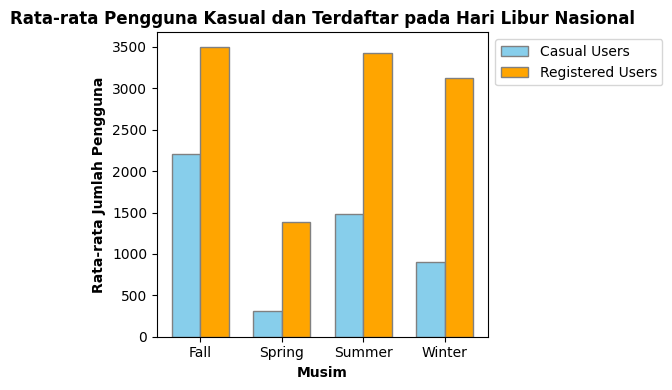

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

# Load dataset
file_path = 'dashboard/day.csv'
df = pd.read_csv(file_path)

# Memetakan nama musim
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_label'] = df['season'].map(season_map)

# Filter data hari libur nasional
holiday_df = df[df['holiday'] == 1]

# Kelompokkan rata-rata pengguna berdasarkan musim
casual_by_season = holiday_df.groupby('season_label')['casual'].mean()
registered_by_season = holiday_df.groupby('season_label')['registered'].mean()

# Bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = np.arange(len(casual_by_season))
r2 = [x + bar_width for x in r1]

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))  # Mengubah ukuran figure

# Membuat chart bar
ax.bar(r1, casual_by_season, color='skyblue', width=bar_width, edgecolor='grey', label='Casual Users')
ax.bar(r2, registered_by_season, color='orange', width=bar_width, edgecolor='grey', label='Registered Users')

# Menambahkan keterangan grafik
ax.set_title('Rata-rata Pengguna Kasual dan Terdaftar pada Hari Libur Nasional', fontsize=12, fontweight='bold')
ax.set_xlabel('Musim', fontweight='bold', fontsize=10)
ax.set_ylabel('Rata-rata Jumlah Pengguna', fontweight='bold', fontsize=10)

# Memindahkan legenda
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Menata layout
plt.xticks(r1 + bar_width / 2, casual_by_season.index)
plt.tight_layout()


### Pertanyaan 2:

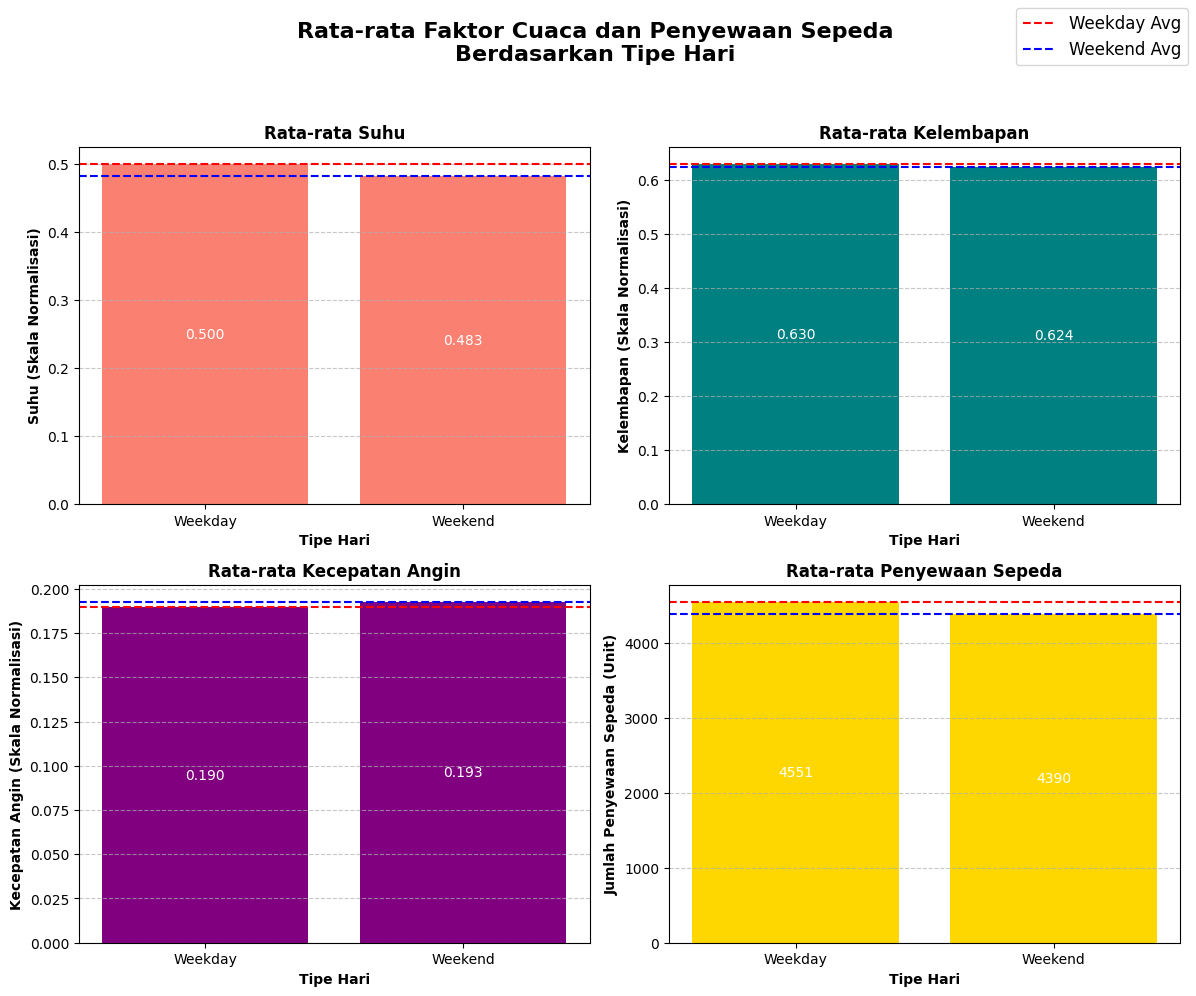

In [7]:
# Menambahkan kolom tipe hari (Weekday/Weekend)
df['day_type'] = df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

# Kelompokkan rata-rata data berdasarkan tipe hari
weather_analysis = df.groupby('day_type')[['temp', 'hum', 'windspeed', 'cnt']].mean()

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Rata-rata Faktor Cuaca dan Penyewaan Sepeda\nBerdasarkan Tipe Hari', fontsize=16, fontweight='bold')

# Subplot 1: Rata-rata Suhu
axes[0, 0].bar(weather_analysis.index, weather_analysis['temp'], color='salmon')
axes[0, 0].set_title('Rata-rata Suhu', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Suhu (Skala Normalisasi)', fontsize=10, fontweight='bold')

for i, v in enumerate(weather_analysis['temp']):
    axes[0, 0].text(i, v / 2, f'{v:.3f}', ha='center', va='center', color='white', fontsize=10)

# Menambahkan garis horizontal untuk setiap tipe hari (Weekday dan Weekend)
axes[0, 0].axhline(y=weather_analysis.loc['Weekday', 'temp'], color='red', linestyle='--', label='Weekday Avg')
axes[0, 0].axhline(y=weather_analysis.loc['Weekend', 'temp'], color='blue', linestyle='--', label='Weekend Avg')

# Subplot 2: Rata-rata Kelembapan
axes[0, 1].bar(weather_analysis.index, weather_analysis['hum'], color='teal')
axes[0, 1].set_title('Rata-rata Kelembapan', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Kelembapan (Skala Normalisasi)', fontsize=10, fontweight='bold')

for i, v in enumerate(weather_analysis['hum']):
    axes[0, 1].text(i, v / 2, f'{v:.3f}', ha='center', va='center', color='white', fontsize=10)

# Menambahkan garis horizontal untuk setiap tipe hari (Weekday dan Weekend)
axes[0, 1].axhline(y=weather_analysis.loc['Weekday', 'hum'], color='red', linestyle='--', label='Weekday Avg')
axes[0, 1].axhline(y=weather_analysis.loc['Weekend', 'hum'], color='blue', linestyle='--', label='Weekend Avg')

# Subplot 3: Rata-rata Kecepatan Angin
axes[1, 0].bar(weather_analysis.index, weather_analysis['windspeed'], color='purple')
axes[1, 0].set_title('Rata-rata Kecepatan Angin', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Kecepatan Angin (Skala Normalisasi)', fontsize=10, fontweight='bold')

for i, v in enumerate(weather_analysis['windspeed']):
    axes[1, 0].text(i, v / 2, f'{v:.3f}', ha='center', va='center', color='white', fontsize=10)

# Menambahkan garis horizontal untuk setiap tipe hari (Weekday dan Weekend)
axes[1, 0].axhline(y=weather_analysis.loc['Weekday', 'windspeed'], color='red', linestyle='--', label='Weekday Avg')
axes[1, 0].axhline(y=weather_analysis.loc['Weekend', 'windspeed'], color='blue', linestyle='--', label='Weekend Avg')

# Subplot 4: Rata-rata Jumlah Penyewaan
axes[1, 1].bar(weather_analysis.index, weather_analysis['cnt'], color='gold')
axes[1, 1].set_title('Rata-rata Penyewaan Sepeda', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Jumlah Penyewaan Sepeda (Unit)', fontsize=10, fontweight='bold')

for i, v in enumerate(weather_analysis['cnt']):
    axes[1, 1].text(i, v / 2, f'{v:.0f}', ha='center', va='center', color='white', fontsize=10)

# Menambahkan garis horizontal untuk setiap tipe hari (Weekday dan Weekend)
axes[1, 1].axhline(y=weather_analysis.loc['Weekday', 'cnt'], color='red', linestyle='--', label='Weekday Avg')
axes[1, 1].axhline(y=weather_analysis.loc['Weekend', 'cnt'], color='blue', linestyle='--', label='Weekend Avg')

# Menambahkan legenda untuk garis rata-rata sekali saja
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=12, frameon=True, fancybox=True)

# Menata layout
for ax in axes.flat:
    ax.set_xlabel('Tipe Hari', fontsize=10, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])

**Insight:**

Pertanyaan 1
- Berdasarkan visualisasi, terlihat bahwa pada hari libur nasional, pengguna terdaftar (registered users) cenderung lebih dominan dibandingkan pengguna kasual (casual users) di semua musim.
- Musim Spring menunjukkan penurunan drastis dalam jumlah pengguna baik terdaftar maupun kasual dibandingkan dengan musim lainnya. Hal ini dapat menunjukkan bahwa kegiatan pada musim Spring mungkin kurang menarik bagi mereka, atau faktor cuaca dan kondisi lain pada musim ini kurang mendukung aktivitas bersepeda bagi mereka.

Pertanyaan 2
- Visualisasi menunjukkan perbedaan berikut antara akhir pekan (weekend) dan hari kerja (weekday):

- Rata-rata suhu pada hari kerja cenderung sedikit lebih tinggi dibandingkan dengan akhir pekan, meskipun perbedaannya tidak signifikan.

- Kelembapan rata-rata lebih rendah pada akhir pekan, yang dapat sedikit meningkatkan kenyamanan untuk aktivitas luar ruang.

- Kecepatan angin rata-rata lebih tinggi pada akhir pekan dibandingkan dengan hari kerja, yang mungkin mempengaruhi keputusan untuk melakukan aktivitas luar ruang.

- Jumlah penyewaan sepeda lebih tinggi pada hari kerja, yang kemungkinan mencerminkan penggunaan sepeda sebagai alat transportasi utama untuk bekerja atau sekolah.

## Analisis Lanjutan (Opsional)

**Load dataset untuk analisis lanjutan**

In [27]:
import pandas as pd
import numpy as np

# Load dataset untuk analisis lanjutan (hour.csv)
file_path_hour = 'hour.csv'
df_hour = pd.read_csv(file_path_hour)

# Preprocessing Data
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour['hour'] = df_hour['hr']
df_hour['month'] = df_hour['mnth']

# Mengelompokkan rata-rata pengguna berdasarkan jam
hour_avg = df_hour.groupby('hour')[['casual', 'registered', 'cnt']].mean().reset_index()

# Menghitung median dan persentil ke-75 dari penggunaan sepeda
median_usage = np.median(hour_avg['cnt'])
percentile_75 = np.percentile(hour_avg['cnt'], 75)

print(f"Median penggunaan sepeda: {median_usage}")
print(f"Persentil ke-75 penggunaan sepeda: {percentile_75}")


Median penggunaan sepeda: 210.1038514442916
Persentil ke-75 penggunaan sepeda: 253.40224547400473


## Menghitung Median dan Persentil ke-75

Pada bagian ini, saya menghitung median dan persentil ke-75 dari rata-rata penggunaan sepeda per jam. Ini akan membantu saya menentukan ambang batas yang optimal untuk mengelompokkan penggunaan sepeda menjadi kategori penggunaan tinggi (High Usage) dan penggunaan rendah (Low Usage).

- **Median**: Nilai tengah dari distribusi data penggunaan sepeda.
- **Persentil ke-75**: Nilai di bawah mana 75% dari data penggunaan sepeda terdistribusi. Ini digunakan sebagai threshold untuk mengidentifikasi penggunaan tinggi.


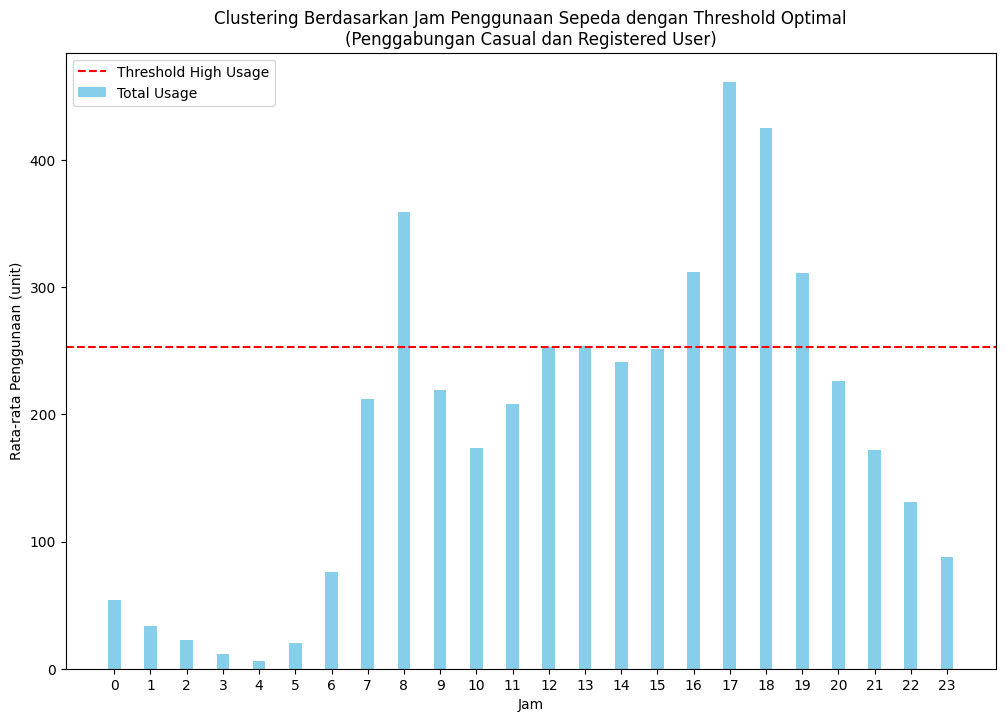

Clustering berdasarkan jam penggunaan dengan threshold optimal:
    hour     casual  registered         cnt usage_cluster
0      0  10.158402   43.739669   53.898072     Low Usage
1      1   6.504144   26.871547   33.375691     Low Usage
2      2   4.772028   18.097902   22.869930     Low Usage
3      3   2.715925    9.011478   11.727403     Low Usage
4      4   1.253945    5.098996    6.352941     Low Usage
5      5   1.411437   18.478382   19.889819     Low Usage
6      6   4.161379   71.882759   76.044138     Low Usage
7      7  11.055021  201.009629  212.064649     Low Usage
8      8  21.679505  337.331499  359.011004    High Usage
9      9  30.891334  188.418157  219.309491     Low Usage
10    10  46.477304  127.191197  173.668501     Low Usage
11    11  59.540578  148.602476  208.143054     Low Usage
12    12  68.293956  185.021978  253.315934     Low Usage
13    13  72.308642  181.352538  253.661180    High Usage
14    14  75.567901  165.381344  240.949246     Low Usage
15    15

In [28]:
# Menggunakan threshold persentil ke-75
def classify_hour_usage(row):
    if row['cnt'] > percentile_75:
        return 'High Usage'
    else:
        return 'Low Usage'

hour_avg['usage_cluster'] = hour_avg.apply(classify_hour_usage, axis=1)

# Visualisasi Hasil Grouping Berdasarkan Jam dengan Threshold Optimal
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(hour_avg.index))

plt.bar(index, hour_avg['cnt'], bar_width, color='skyblue', label='Total Usage')
plt.axhline(y=percentile_75, color='red', linestyle='--', label='Threshold High Usage')

plt.xticks(index, hour_avg['hour'])
plt.title('Clustering Berdasarkan Jam Penggunaan Sepeda dengan Threshold Optimal\n(Penggabungan Casual dan Registered User)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penggunaan (unit)')
plt.legend(loc='upper left')
plt.show()

# Menampilkan hasil DataFrame setelah clustering dengan threshold optimal
print("Clustering berdasarkan jam penggunaan dengan threshold optimal:")
print(hour_avg)


## Clustering Berdasarkan Jam Penggunaan dengan Threshold Optimal

Pada bagian ini, kita menggunakan persentil ke-75 sebagai threshold untuk mengelompokkan rata-rata penggunaan sepeda per jam menjadi dua kategori: penggunaan tinggi (High Usage) dan penggunaan rendah (Low Usage). Rata-rata penggunaan ini merupakan penggabungan dari casual dan registered user.

### Langkah-langkah:
1. **Definisikan Klasifikasi Penggunaan**: Menggunakan nilai threshold untuk menentukan apakah penggunaan sepeda pada jam tertentu termasuk ke dalam kategori penggunaan tinggi atau rendah.
2. **Visualisasi**: Membuat bar chart yang menunjukkan rata-rata penggunaan sepeda per jam, dengan garis horizontal yang menunjukkan threshold penggunaan tinggi.
3. **Output DataFrame**: Menampilkan DataFrame yang menunjukkan kategori penggunaan setiap jam berdasarkan threshold yang telah ditentukan.

- **Rata-rata Penggunaan**: Rata-rata jumlah pengguna sepeda pada jam tertentu (penggabungan dari casual dan registered user).
- **Threshold**: Garis pembatas (persentil ke-75) yang digunakan untuk mengelompokkan penggunaan menjadi tinggi dan rendah.


**Insight:**
- Penggunaan sepeda mencapai puncaknya pada jam 8 pagi dan 5 sore, menunjukkan bahwa sepeda banyak digunakan saat jam sibuk untuk pergi dan pulang kerja atau sekolah.
- Sebagian besar waktu dalam sehari memiliki penggunaan sepeda yang rendah, dengan hanya beberapa jam tertentu yang menunjukkan penggunaan tinggi. Ini menunjukkan ada peluang untuk meningkatkan penggunaan sepeda pada waktu-waktu yang kurang sibuk.

## Conclusion

**Conclusion untuk Pertanyaan 1**

Dari analisis, ditemukan bahwa rata-rata pengguna kasual (casual) dan terdaftar (registered) pada hari libur nasional berbeda berdasarkan musim.

*   Pengguna kasual lebih banyak ditemukan pada musim tertentu dibanding musim lainnya, yang menunjukkan bahwa cuaca dan kondisi musim berperan signifikan dalam memengaruhi tingkat penggunaan sepeda pada hari libur.
*   Pengguna terdaftar cenderung lebih konsisten, meskipun terdapat sedikit variasi berdasarkan musim. Hal ini menunjukkan bahwa pengguna terdaftar memiliki pola penggunaan yang lebih stabil dibandingkan pengguna kasual.

**Conclusion untuk Pertanyaan 2**

Analisis menunjukkan adanya perbedaan signifikan dalam rata-rata suhu, kelembapan, kecepatan angin, dan tingkat penyewaan sepeda antara hari kerja (Weekday) dan akhir pekan (Weekend).
*   Pada akhir pekan, suhu rata-rata cenderung lebih tinggi dan kelembapan lebih rendah dibandingkan hari kerja, yang kemungkinan menarik lebih banyak pengguna sepeda.
*   Tingkat penyewaan sepeda juga lebih tinggi pada akhir pekan, terutama karena waktu luang lebih banyak tersedia untuk rekreasi, sedangkan pada hari kerja penyewaan sepeda lebih terkait dengan keperluan transportasi harian.



